# Data Exploration and Storytelling #

## Introduction ##
The goal of our project is to create a model that can categorize a given review as positive or negative. To create the model, we will use star ratings (ranging from 1-5) in our data set to categorize reviews as positve or negative. Accordingly, we want to analyze the properties of the star rating data, the review data, and the interactions between these two sets of data.

The goal of this notebook is to explore our data set of Yelp restaurant ratings and reviews.
Our intention is to explore relationships within the data and begin to identify stories about those relationships.

The data set has three columns: unique IDs for each restaurant ('business_id'), star ratings between 1-5 for each review ('ratings'), and the text of written reviews ('text'). We will focus especially on exploring a number of features of the 'stars' column, the 'text' column, and the relationships between the two.
***
In our exploration of the data, we will investigate three sets of questions.

**First, we will investigate questions about the star rating data:**
* What is the total number of each star rating in the data set?
* What is the proportion of each star rating out of all ratings?
* What is the average star rating for each restaurant?
* What is the distribution of ratings for some specific restaurants that have multiple reviews?

**Second, we will investigate questions about the review data:**
* How many reviews has each restaurant received?
* What is the distribution of the length of the reviews?

**Finally, we will investigate questions about the interaction between the star rating and review data:**
* What is the relationship between rating and review length?
* What are common words in the reviews for each star rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
# Import data as DataFrame
reviews = pd.read_csv('/Users/dwalkerpage/Documents/Data_Science/Springboard/Projects/springboard/Capstone_Projects/Capstone_Project_1/Capstone_Project_1_Data/restaurant_reviews_final.csv')

In [10]:
reviews.head()

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...
4,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would..."


# 1. Exploration of Review Data #

## Question: What is the total number of each star rating in the data set? ##
Answering this question will help us to understand the distribution of star ratings in the data set, which will help us to know the size of our sample for each star rating, and whether the different ratings are evenly distributed.

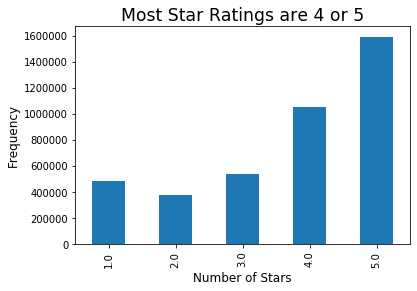

In [5]:
# Plot total number/frequency of each star rating
_ = star_cts.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

In [4]:
# Count total number of each star rating
star_cts = reviews.stars.value_counts()
star_cts

5.0    1589831
4.0    1054999
3.0     538961
1.0     481143
2.0     378515
Name: stars, dtype: int64

**Conclusions**: It looks like there are a lot more 4 and 5 star ratings in our data set than ratings 1, 2, or 3. We will be able to see this more clearly if we consider the proportion of ratings as a percentage of all of the ratings in the data set.

## Question: What is the proportion of each star rating out of all ratings? ##
As with the previous question, answering this question will help us to understand the distribution of the different star ratings in our data set.

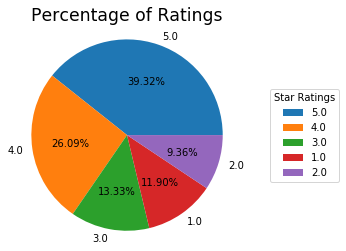

In [7]:
# Plot of percentage of ratings for each rating
_ = star_cts.plot.pie(autopct='%1.2f%%', radius=1.1)
_ = plt.ylabel('')
_ = plt.title('Percentage of Ratings', fontsize='xx-large')
_ = plt.legend(title='Star Ratings',
               loc='center right',
               bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [6]:
# Percentage of 1 star reviews
print('Approximately {}% of the star ratings are 1 star.'.format(round((star_cts.loc[1.0] / len(reviews)) * 100, 2)))

# Percentage of 2 star reviews
print('Approximately {}% of the star ratings are 2 stars.'.format(round((star_cts.loc[2.0] / len(reviews)) * 100, 2)))

# Percentage of 3 star reviews
print('Approximately {}% of the star ratings are 3 stars.'.format(round((star_cts.loc[3.0] / len(reviews)) * 100, 2)))

# Percentage of 4 star reviews
print('Approximately {}% of the star ratings are 4 stars.'.format(round((star_cts.loc[4.0] / len(reviews)) * 100, 2)))

# Percentage of 5 star reviews
print('Approximately {}% of the star ratings are 5 stars.'.format(round((star_cts.loc[5.0] / len(reviews)) * 100, 2)))

Approximately 11.9% of the star ratings are 1 star.
Approximately 9.36% of the star ratings are 2 stars.
Approximately 13.33% of the star ratings are 3 stars.
Approximately 26.09% of the star ratings are 4 stars.
Approximately 39.32% of the star ratings are 5 stars.


**Conclusions**: Our initial impressions with the first question were correct: a large percentage of the ratings are either 4 or 5 stars. In particular, approximately 65% of the ratings in the data set are either 4 or 5 stars. We should keep this in mind as we construct our model. Since there are more reviews corresponding to 4 or 5 stars, we might be able to construct a more accurate model for positive reviews than negative reviews.

## Question: What is the average star rating for each restaurant? ##
We do not simply want to consider all of the ratings together. There are likely individual restaurants with multiple reviews/ratings in the data set. It will be helpful to consider the distribution of ratings for individual restaurants. For example, are most restaurants in the dataset (on average) five star restaurants? Are most one star restaurants? Or is there an equal distribution of each star rating?

In [5]:
# Group review data by business_id and calculate mean star rating for each restaurant
df = reviews.groupby(['business_id']).mean()

In [2]:
#df.head()

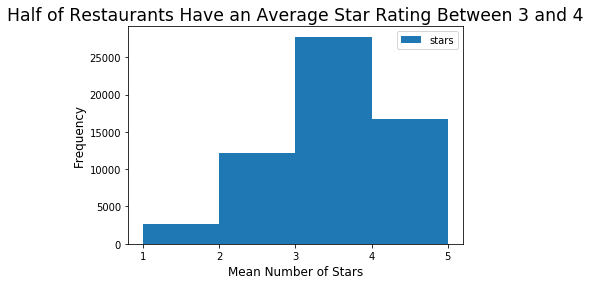

In [10]:
# Plot histogram of frequency of mean star rating for each restaurant
_ = df.plot.hist(bins=[1, 2, 3, 4, 5])
_ = plt.xticks(ticks=[1, 2, 3, 4, 5])
_ = plt.xlabel('Mean Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Half of Restaurants Have an Average Star Rating Between 3 and 4', fontsize='xx-large')

plt.show()

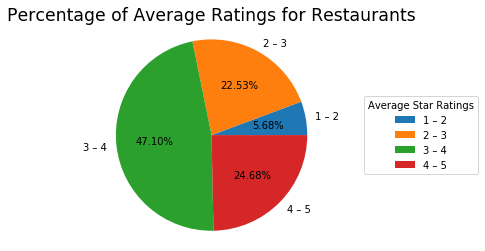

In [30]:
# Calculate percentage of average ratings for restaurants
# Construct pie plot to display the percentages

# Percentage of restaurants whose mean star rating is between 1 and 2
one_to_two = len((df[(df['stars'] > 1) & (df['stars'] <= 2)]) / len(df)) * 100

# Percentage of restaurants whose mean star rating is between 2 and 3
two_to_three = len((df[(df['stars'] > 2) & (df['stars'] <= 3)]) / len(df)) * 100

# Percentage of restaurants whose mean star rating is between 3 and 4
three_to_four = len((df[(df['stars'] > 3) & (df['stars'] <= 4)]) / len(df)) * 100

# Percentage of restaurants whose mean star rating is between 4 and 5
four_to_five = len((df[(df['stars'] > 4) & (df['stars'] <= 5)]) / len(df)) * 100


_ = plt.pie([one_to_two, two_to_three, three_to_four, four_to_five],
            labels=['1 – 2', '2 – 3', '3 – 4', '4 – 5'],
            autopct='%1.2f%%',
            radius=1.1)
_ = plt.title('Percentage of Average Ratings for Restaurants', fontsize='xx-large')
_ = plt.legend(title='Average Star Ratings',
               loc='center right',
               bbox_to_anchor=(1.25, 0, 0.5, 1))

plt.show()

A large proportion of restaurants have average ratings between 3 and 5. Approximately half of all restaurants have a mean star rating between 3 and 4. Approximately 75% of all restaurants have a mean star rating between 3 and 5.

In [49]:
# Compute descriptive statistics of mean star ratings
df.describe()

,stars
count,59287.000000
mean,3.444693
std,0.797605
min,1.000000
25%,2.984791
50%,3.533333
75%,4.000000
max,5.000000


**Conclusions**: As noted above, a large proportion of restaurants (approximately 75%) are (on average) reviewed positively, if we construe an average rating of greater than 3 as being reviewed positively.

## Question: What is the distribution of ratings for some specific restaurants that have multiple reviews? ##
It's worth exploring a few specific restaurants to see how the ratings are distributed for those specific restaurants, and consider how those distributions compare to the distributions displayed above for the data set as a whole.

In [15]:
# Count total number of each star rating for restaurant RESDUcs7fIiihp38-d6_6g
rest1_ratings_count = reviews[reviews['business_id'] == 'RESDUcs7fIiihp38-d6_6g'].stars.value_counts()
print('Restaurant RESDUcs7fIiihp38-d6_6g has {} total reviews.'.format(len(reviews[reviews['business_id'] == 'RESDUcs7fIiihp38-d6_6g'])))
rest1_ratings_count

Restaurant RESDUcs7fIiihp38-d6_6g has 8521 total reviews.


5.0    3376
4.0    2264
3.0    1294
1.0     828
2.0     759
Name: stars, dtype: int64

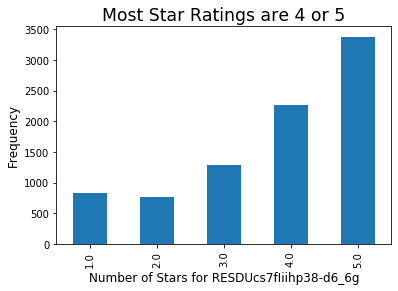

In [16]:
# Plot total number/frequency of each star rating for restaurant RESDUcs7fIiihp38-d6_6g
_ = rest1_ratings_count.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for RESDUcs7fIiihp38-d6_6g', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

Note that the shape of this distribution closely resembles the shape of the distribution of all star ratings for the entire data set. It's worth analyzing some other specific restaurants to see how closely their distributions resemble this.

In [17]:
# Count total number of each star rating for restaurant 4JNXUYY8wbaaDmk3BPzlWw
rest2_ratings_count = reviews[reviews['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw'].stars.value_counts()
print('Restaurant 4JNXUYY8wbaaDmk3BPzlWw has {} total reviews.'.format(len(reviews[reviews['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw'])))
rest2_ratings_count

Restaurant 4JNXUYY8wbaaDmk3BPzlWw has 8516 total reviews.


5.0    3909
4.0    2882
3.0     969
2.0     455
1.0     301
Name: stars, dtype: int64

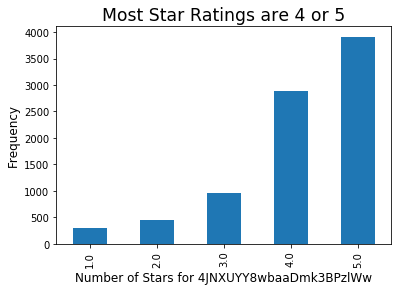

In [18]:
# Plot total number/frequency of each star rating for restaurant 4JNXUYY8wbaaDmk3BPzlWw
_ = rest2_ratings_count.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for 4JNXUYY8wbaaDmk3BPzlWw', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

In [19]:
# Count total number of each star rating for restaurant NvKNe9DnQavC9GstglcBJQ
rest3_ratings_count = reviews[reviews['business_id'] == 'NvKNe9DnQavC9GstglcBJQ'].stars.value_counts()
print('Restaurant NvKNe9DnQavC9GstglcBJQ has {} total reviews.'.format(len(reviews[reviews['business_id'] == 'NvKNe9DnQavC9GstglcBJQ'])))
rest3_ratings_count

Restaurant NvKNe9DnQavC9GstglcBJQ has 2816 total reviews.


4.0    1118
5.0     963
3.0     438
2.0     149
1.0     148
Name: stars, dtype: int64

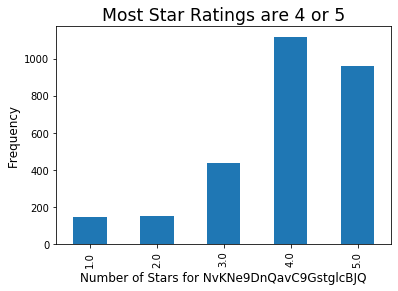

In [20]:
# Plot total number/frequency of each star rating for restaurant NvKNe9DnQavC9GstglcBJQ
_ = rest3_ratings_count.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for NvKNe9DnQavC9GstglcBJQ', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

Let's compare these three restaurants in a single DataFrame and plot.

In [50]:
# Construct DataFrame with ratings counts for all three restaurants
ratings_count_df = pd.concat([rest1_ratings_count, rest2_ratings_count, rest3_ratings_count], axis=1)
ratings_count_df.columns = ['RESDUcs7fIiihp38-d6_6g', '4JNXUYY8wbaaDmk3BPzlWw', 'NvKNe9DnQavC9GstglcBJQ']
#ratings_count_df

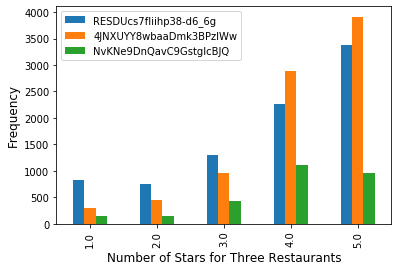

In [22]:
# Plot total number/frequency of each star rating for all three restaurants
_ = ratings_count_df.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for Three Restaurants', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')

plt.show()

**Conclusions**: We can see that the distribution of ratings for these three restaurants corresponds fairly closely to the distribution of ratings in the overall data set.

# 2. Exploration of Review Data #

## Question: How many reviews has each restaurant received? ##
Answering this question will help us to understand the distribution of reviews across individual restaurants in our data set.

In [29]:
# Count number of reviews per restaurant
reviews_per_rest = reviews['business_id'].value_counts()
reviews_per_rest.head()

RESDUcs7fIiihp38-d6_6g    8521
4JNXUYY8wbaaDmk3BPzlWw    8516
K7lWdNUhCbcnEvI0NhGewg    6867
f4x1YBxkLrZg652xt2KR5g    5821
cYwJA2A6I12KNkm2rtXd5g    5537
Name: business_id, dtype: int64

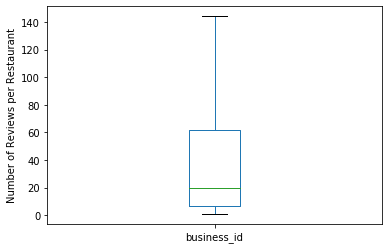

count    59287.000000
mean        68.201275
std        176.910411
min          1.000000
25%          7.000000
50%         20.000000
75%         62.000000
max       8521.000000
Name: business_id, dtype: float64

In [65]:
# Construct plot indicating descriptive stats for number of reviews
# See chart below for full description
_ = reviews_per_rest.plot.box(showfliers=False)
_ = plt.ylabel('Number of Reviews per Restaurant')

plt.show()

# Compute descriptive statistics for number of reviews per restaurant
reviews_per_rest.describe()

**Conclusions**: The summary statistics reveal that there is a lot of variation in the number of reviews for individual restaurants since there is a large standard deviation. The mean is also significantly larger than the median, indicating that there are outliers with large numbers of reviews. The median is probably a better measure of the central tendency of the data.

## Question: What is the distribution of the length of the reviews? ##
It could be helpful to compare ratings with length of reviews. For example, if reviews corresponding to ratings of 4 or 5 tend to be much shorter, than reviews for the other ratings, this might suggest that positive reviews tend to be shorter and negative reviews tend to be longer. But let's first explore the typical lengths of the reviews.

For simplicity, we can use number of characters (including letters, spaces, punctuation, etc.) as the metric for length of a review. This metric will be useful as an approximation of length.

In [51]:
# Construct series of review lengths (measured in terms of number of characters in review)
review_lens = reviews['text'].str.len()
#review_lens

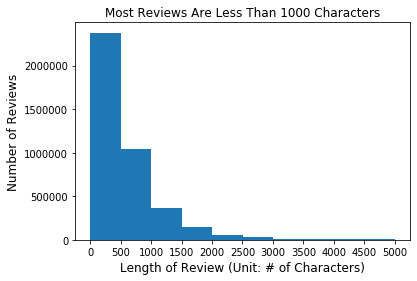

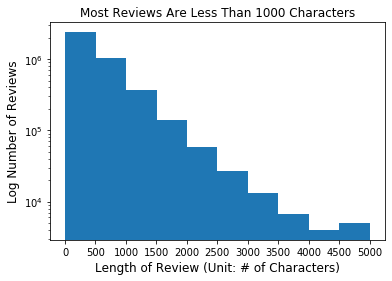

In [95]:
# Construct histogram plot of review lengths
_ = review_lens.plot.hist()
_ = plt.xticks(ticks=range(0, 5001, 500))
_ = plt.xlabel('Length of Review (Unit: # of Characters)', fontsize='large')
_ = plt.ylabel('Number of Reviews', fontsize='large')
_ = plt.title('Most Reviews Are Less Than 1000 Characters', fontsize='large')

plt.show()

_ = review_lens.plot.hist(log=True)
_ = plt.xticks(range(0, 5001, 500))
_ = plt.xlabel('Length of Review (Unit: # of Characters)', fontsize='large')
_ = plt.ylabel('Log Number of Reviews', fontsize='large')
_ = plt.title('Most Reviews Are Less Than 1000 Characters', fontsize='large')

plt.show()

**Conclusions**: Most reviews are less than 1000 characters.

# 3. Exploration of Interactions Between Star Rating Data and Review Data #

## Question: What is the relationship between rating and review length? ##
As I suggested above, understanding the relationship between rating and review length could help us to tune our model. If there is a strong correlation between rating and review length, length of review could be used as one variable for classifying reviews as positive or negative.

In [66]:
# Construct new DataFrame with review lengths added as a column
review_lens_df = reviews.copy()
review_lens_df['review_lengths'] = review_lens
#review_lens_df.head()

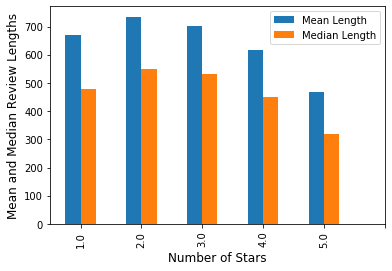

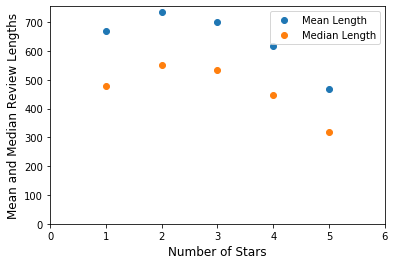

review_lengths       
                mean median
stars                      
1.0       669.122246    479
2.0       734.363719    551
3.0       701.818360    533
4.0       615.932487    449
5.0       469.145701    320

In [68]:
len_stats = review_lens_df.groupby('stars').agg([np.mean, np.median])

_ = len_stats.plot.bar()
_ = plt.xticks(range(6))
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Mean and Median Review Lengths', fontsize='large')
_ = plt.legend(['Mean Length', 'Median Length'])

plt.show()

_ = len_stats.plot(marker='.', linestyle='', ms=12)
_ = plt.xticks(range(7))
_ = plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Mean and Median Review Lengths', fontsize='large')
_ = plt.legend(['Mean Length', 'Median Length'])

plt.show()

len_stats

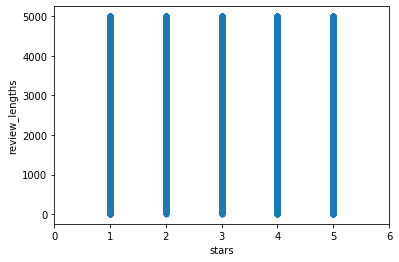

In [84]:
# Construct scatter plot comparing star ratings with review lengths
# Shows that there is a wide range of lengths for each star rating
_ = review_lens_df.plot.scatter('stars', 'review_lengths')
_ = plt.xticks(range(7))

plt.show()

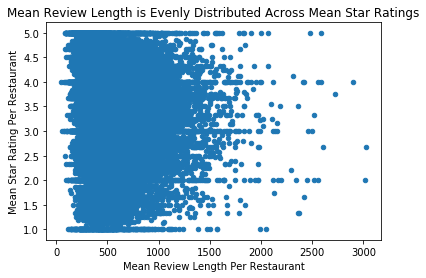

In [94]:
# Construct scatter plot comparing the average rating for each restaurant 
# with the average review length for each restaurant
_ = review_lens_df.groupby(['business_id']).mean().plot.scatter('review_lengths', 'stars')
_ = plt.xlabel('Mean Review Length Per Restaurant')
_ = plt.ylabel('Mean Star Rating Per Restaurant')
_ = plt.title('Mean Review Length is Evenly Distributed Across Mean Star Ratings')

plt.show()

**Conclusions**: These plots show that although reviews corresponding to 2 star ratings tend to be slightly longer than reviews corresponding to other ratings, in general, the length of reviews is fairly evenly distributed across different star ratings. The final plot (immediately above) indicates this most clearly. Review length, therefore, probably will not be vary useful as a variable for classifying reviews as positive or negative.

## Question: What are common words in the reviews for each star rating? ##
Answering this question can help us to see whether certain words tend to be especially common in positive or negative reviews. For example, if certain words are especially common in 1 star reviews and uncommon in reviews corresponding to other ratings, then the presence of those words could help to indicate that a review is negative.

To answer this question visually, we can construct word clouds of reviews for each star rating.

In [67]:
# Define function for constructing WordClouds
# x is a Series or DataFrame column
# n is a variable to represent fill out the title of the Word Cloud

def Cloud(x, n):
    # Convert all text in reviews to lowercase to avoid duplicate words
    x = x.str.lower()
    
    # Join all reviews into a single string
    rating_text = ''.join(r for r in x)
    
    # Generate wordcloud object
    wordcloud = WordCloud(width=800, height=500,
                          background_color='white',
                          stopwords=set(STOPWORDS)).generate(rating_text)
    
    # Construct Word Cloud plot
    _ = plt.figure(figsize=(10,10))
    _ = plt.imshow(wordcloud)
    _ = plt.axis('off')
    _ = plt.title('Word Cloud for {} Star Ratings'.format(n), fontsize=25, pad=20)
    
    return plt.show()

In [68]:
# Extract random samples of reviews for each star rating
''' We will select samples of size 1000,
as per the recommendation at this website: <http://www.tools4dev.org/resources/how-to-choose-a-sample-size/>
'''
rating_1_sample = reviews[reviews['stars'] == 1].text.sample(n=1000, random_state=7)
rating_2_sample = reviews[reviews['stars'] == 2].text.sample(n=1000, random_state=7)
rating_3_sample = reviews[reviews['stars'] == 3].text.sample(n=1000, random_state=7)
rating_4_sample = reviews[reviews['stars'] == 4].text.sample(n=1000, random_state=7)
rating_5_sample = reviews[reviews['stars'] == 5].text.sample(n=1000, random_state=7)

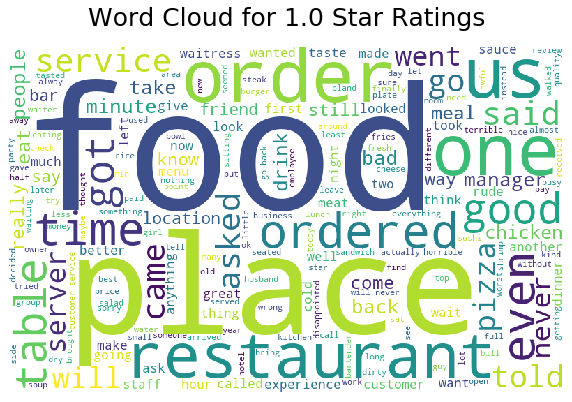

In [69]:
Cloud(rating_1_sample, 1.0)

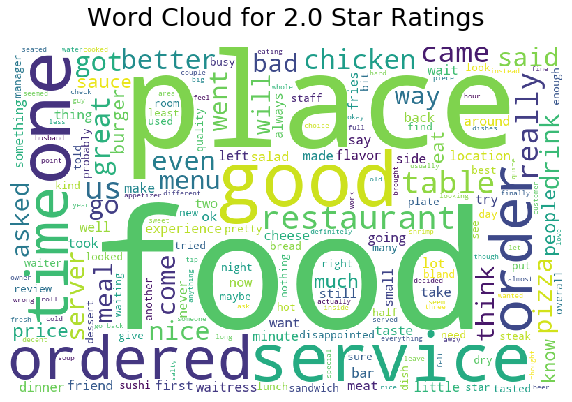

In [66]:
Cloud(rating_2_sample, 2.0)

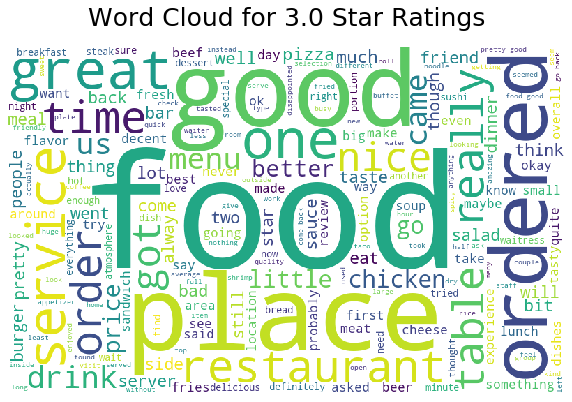

In [70]:
Cloud(rating_3_sample, 3.0)

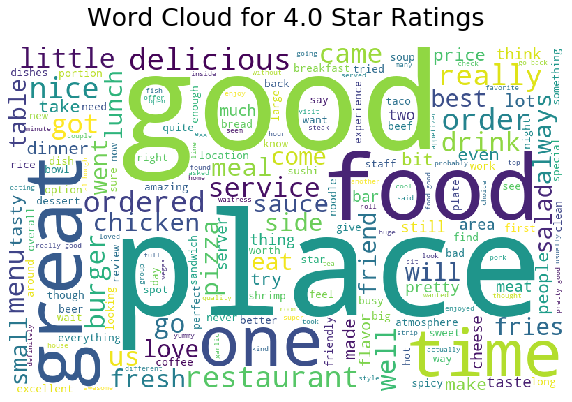

In [71]:
Cloud(rating_4_sample, 4.0)

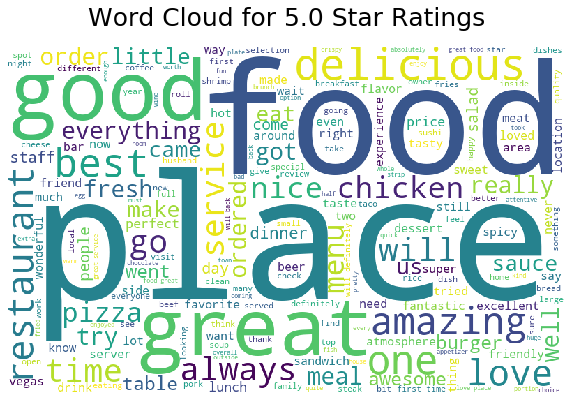

In [72]:
Cloud(rating_5_sample, 5.0)

**Conclusions**: The word clouds, at least in their current form, are not very helpful for distinguishing between the different star ratings. Some of the largest (and hence most common) words are present across all of the star ratings.

# Summary of Conclusions and Findings #
We can summarize findings from the above exploration as follows:
* Most star ratings in the data set are either 4.0 or 5.0.
* The most common average star rating for individual restaurants is between 3.0 and 4.0.
* The median number of reviews for individual restaurants is 20.
* Most reviews are less than 1000 characters long.
* For individual restaurants, the mean review length is evenly distributed across different mean ratings.